## <font color = '#0f0264'> <center> Referat laborator 10 </center></font>

Completati cerintele indicate mai jos si verificati corectitudinea rezultatelor; referatul acestui laborator nu se trimite pentru evaluare.

Rulati codul indicat in celula de mai jos, care frunizeaza functiile utilizate la afisarea rezultatelor.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# functie afisare forme unda marimi electrice
def draw_waveforms(wf1, wf2, title1, title2):
    '''
    functia afiseaza intr-un grid 2 linii x 1 coloana
    variatiile in timp (formele de unda) ale marimilor 
    wf1 si wf2;
      wf1, wf2       = marimile pentru care se afiseaza formele de unda
      title1, title2 = titlurile graficelor variatiilor marimilor electrice afisate 
    '''
    wfs    = (wf1, wf2)
    titles = (title1, title2)
    colors = ['black', 'blue']

    fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6))
    
    for i,ax in enumerate(axs):
        ax.set_title(titles[i])
        ax.set_xlabel(f'Time[{wfs[i].abscissa.unit}]')
        ax.set_ylabel(f'Voltage[{wfs[i].unit}]')
        ax.grid('on', linewidth = 0.25, linestyle = '--', color = 'green')
        ax.plot( np.array(wfs[i].abscissa),  np.array(wfs[i]), color = colors[i])
     
    plt.tight_layout()
    
# functie afisare grafic caracteristica de frecventa:
def draw_freq_characteristics(analysis, wf):
    '''
    functia afiseaza variatia in FRECVENTA a marimii wf;
    functia afiseaza punctat nivelul care corespunde frecventelor
    care definesc banda de frecventa;
    
    analysis: primeste valorile generate de catre analiza AC
    wf: primeste obiectul WaveForm pentru care se afiseaza variatia in frecventa, pe intreg domeniul de analiza
    '''
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))

    ax.set_title('Caracteristica de frecventa a amplificatorului')
    ax.set_xlabel(f'Frequency[{analysis.frequency.unit}]')
    ax.set_ylabel(f'AVg[{wf.unit}]')
    ax.set_xscale('log')
    ax.grid('on', linewidth = 0.5, linestyle = '--', color = 'green')
    ax.plot( np.array(analysis.frequency),  np.array(wf), color = 'blue')
    ax.axhline(y=0.707*wf.max().item(), linestyle = '--')
    
# functie extragere frecvente caracteristice amplificator:
def get_frequencies(analysis, av):
    '''
    functia returneaza sub forma de obiect "tuple" (fj, fs)
    frecventele care corespund benzii de frecventa; 
    fj,fs sunt obiecte FrequencyValue
    
    analysis: primeste rezultatele generate de catre analiza AC
    av: primeste valorile amplificarii, valabile pe intreg domeniul de analiza
    '''
    diff = np.absolute(np.array(av) -  np.array(av).max()*0.707)
    diff_j = diff[:int(len(diff)/2)]
    diff_s = diff[int(len(diff)/2):]
    idxj = diff_j.argmin()
    idxs = int(len(diff)/2) + diff_s.argmin()
    
    fj = analysis.frequency[idxj] 
    fs = analysis.frequency[idxs] 
      
    return fj,fs

## 1. Amplificator de semnal mic cu tranzistor MOS

#### 1.1. Determinarea Punctului Static de Functionare

1. să se editeze circuitul de amplificare cu tranzistor MOS, indicat in Figura 1; la iesirea acestuia nu este conectata sarcina.

<img src = '1005.png' width = 800 height = 600>
<p style="text-align: center;">Figura 1. Circuitul de amplificare cu tranzistor MOS </p>

Elementele circuitului sunt:
- sursa $V_{DD}$ reprezinta o **sursa de tensiune continua** - sursa de polarizare a tranzistorului; valoarea tensiunii electrice generata de sursa $V_{DD}$ este este indicata in Tabelul 1; 
- sursa $v_G$ reprezinta o **sursa de tensiune sinusoidala**; tensiunea electrica generata de sursa $v_G$ reprezinta informatia aplicata la intrarea circuitului, pe care acesta o amplifica; parametrii tensiunii sinusoidale sunt:
  - valoare medie = $0[V]$;
  - amplitudine = $100[mV]$ 
  - frecventa = $1[kHz]$;
- rezistoarele $R_{G1}, R_{G2}, R_D$ si $R_S$ sunt rezistoarele de polarizare ale tranzistorului; rolul acestora este de a controla regiunea de functionare a tranzistorului; pentru a amplifica semnalele, tranzistorul MOS trebuie sa functioneze in regiunea de Saturatie;
- rezistenta $R_g$ reprezinta rezistenta interna a sursei de tensiune $v_G$; $R_g = 600[\Omega]$
- condensatorul $C_G$ decupleaza in regim de curent continuu, circuitul de polarizare al tranzistorului, compus din cele 4 rezistoare de polarizare si sursa de alimentare $V_{DD}$, de sursa de tensiune conectata la bornele de intrare ale amplificatorului, in scopul mentinerii valorii PSF-ului tranzistorului in regiunea de Saturatie; $C_G = 220\mu F$ 
- condensatorul $C_S$ cupleaza in regim de variabil sursa tranzistorului MOS la masa circuitului, in scopul cresterii valorii amplificarii in tensiune; $C_S = 220\mu F$ 


- pentru tranzistorul MOS $M$ se alege modelul indicat in Tabelul 2.

<p style="text-align: center;">Tabelul 1. Valorile componentelor amplificatorului </p>

|Numar   |VDD [V]      |RG2 [kOhm]   | RG1 [kOhm]  |RD [kOhm]    |RS [Ohm]     |  
|:------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
|1-20    |10           |68           |27           |22           |680          |

<p style="text-align: center;"> Tabelul 2. Parametrii modelului trazistorului MOS </p>

|Numar   |Nume model tranzistor|VTO[V]|KP[A/V^2]|RD[Ohm]|RS[Ohm]|CBD[pF]|CBS[pF]|
|:------:|:-------------------:|:----:|:-------:|:-----:|:-----:|:-----:|:-----:|  
|1 - 20  |BS170                |1     |0.2E-3   |2      |0.5    |5      |5      |


2. sa se simuleze circuitul din Figura 1 la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se analizeze circuitul astfel incat sa rezulte valorile marimilor electrice continue;
3. sa se determine tensiunea $V_{GS}$ si Punctul Static de Functionare al tranzistorului ($I_D, V_{DS}$); determinarea valorii curentului $I_D$, se va realiza pe baza legii lui Ohm, aplicata rezistorului $R_D$;
4. pornind de la valoarea obtinuta pentru tensiunea $V_{DS}$, sa se verifice daca tranzistorul MOS lucreaza in saturatie; in cazul in care se constata ca tranzistorul nu lucreaza in saturatie, circuitul descris contine erori (componente conectate gresit sau valori gresite pentru anumite componente); in acest caz, eroarea/erorile trebuie depistate si corectate, apoi se reia simularea circuitui si se extrag rezultatele nou obtinute;
5. sa se afiseze valorile obtinute prin calcul teoretic ale tensiunii $V_{GS}$ si ale PSFului tranzistorului MOS.

In [ ]:
# import utilitare
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import numpy as np

# instanta circuit
circuit1 = ...

# model tranzistor
 
# valoarea lui KP este exprimata in A/V**2 si este egala cu 2*k
# unde k = parametrul de transconductanta al tranzistorului MOS, 
# considerat in formulele teoretice
circuit1.model('BS170', 'NMOS', , level=1,
            VTO = 1@u_V,   KP  = 0.0002, 
            CBD = 5@u_pF,  CBS = 5@u_pF,
            RD  = 2@u_Ohm, RS  = 0.5@u_Ohm)

# netlist

# afisare netlist

# instanta simulator
simulator1 = ...

# analiza circuit si salvare rezultate analiza
analysis_op = ...

# tensiune continua VGS
VGS = ...

# curent continuu ID
ID = ...

# tensiune continua VDS
VDS = ...

# afisare valoare VGS: valoare numerica + unitate de masura

# afisare valoare P.S.F tranzistor: valoare numerica + unitate de masura
print('-'*10, 'PSF', '-'*10)

# verificare SATURATIE: 
# completati valoarea numerica (fara unitate masura) a tensiunii de prag VTO a tranzistorului
VTO = ...
print('-'*10, 'Verificare regiune Saturatie', '-'*10)
sat_verif = VDS.item() >= VGS.item() - VTO
print(f'M lucreaza in Saturatie: {"ADEVARAT" if sat_verif else "FALS"}')
print('-'*10, 'Calcule teoretice', '-'*3)

# in calculele teoretice, k = KP/2 = 0.1 mA/V**2!!
# afisare VGS_teoretic: valoare numerica + unitate de masura

# afisare PSF_teoretic: valoare numerica + unitate de masura


In [1]:
# rezultate corecte: nu stergeti celula 

VGS: 2.656 V
ID:  0.000274 A
VDS: 3.784 V
---------- Verificare Saturatie ----------
M lucreaza in Saturatie: ADEVARAT
---------- Calcule teoretice Saturatie ---
VGS_teoretic:  2.656 V
ID_teoretic:   0.000274 A
VDS_teoretic:  3.785 V


#### 1.2. Amplificarea in tensiune a amplificatorului neconectat la circuitele externe

1. sa se simuleze circuitul din Figura 1, la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim tranzitoriu; parametrii analizei sunt:
  - numar perioade semnal vizualizate, *N* = 5
  - numar puncte simulare, *POINTS* = 500
2. sa se determine tensiunea de intrare $v_I$ in amplificator, respectiv tensiunea de iesire $v_O$ din amplificator; tensiunea de iesire a amplificatorului este masurata din colectorul tranzistorului la masa circuitului;
3. sa se determine **amplitudinea** tensiunii de intrare $v_I$, respectiv **amplitudinea** tensiunii de iesire $v_O$, ale amplificatorului;
4. sa se determine modulul amplificarii in tensiune $|A_V|$, a amplificatorului;
5. sa se calculeze cu formula din documentatia laboratorului, valoarea teoretica a modulului amplificarii in tensiune $|A_{V-teoretic}|$ a amplificatorului;
6. sa se afiseze rezultatele obtinute;
7. sa se vizualizeze formele de unda ale tensiunii de intrare $v_I$, respectiv tensiunii de iesire $v_O$ ale amplificatorului; in acest scop, se va apela functia `draw_waveforms()`, implementata la inceputul laboratorului.

In [ ]:
# analiza circuit si salvare rezultate analiza
N      = ...
POINTS = ...
PERIOD = ...
analysis_tr1 = ...

# extragere tensiune de intrare vI
vI_wf = ...

# extragere tensiune de iesire vO
vO_wf = ...

# calcul amplitudine Vi
Vi = ...

# calcul amplitudine Vo
Vo = ...

# calcul amplificare tensiune
AV = ...

# afisare amplitudine Vi (valoare numerica + unitate masura)

# afisare amplitudine Vo (valoare numerica + unitate masura)

# afisare AV (valoare numerica)

# afisare AV_teoretic (valoare numerica)

# afisare forme unda vI, vO


Vi = 0.097 V
Vo = 0.706 V
AV = 7.284
---------- Calcule teoretice ------
AV_teoretic = 7.282


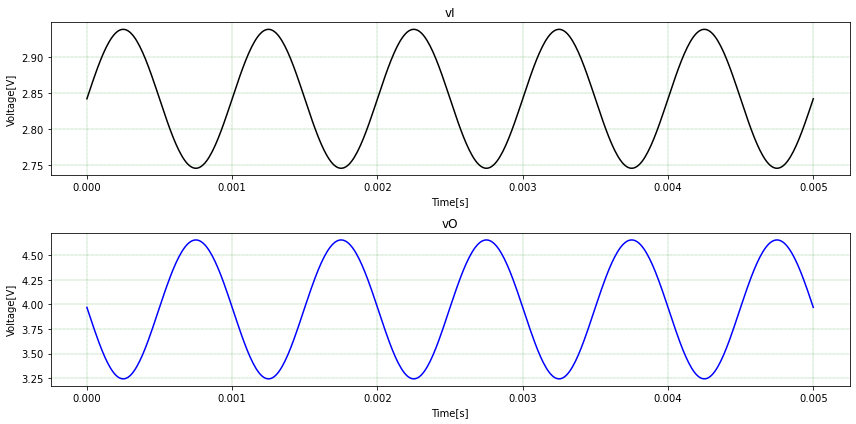

In [3]:
# rezultate corecte: nu stergeti celula 

#### 1.3. Determinarea rezistentei de intrare a amplificatorului 

In rezultatele obtinute la punctul precedent, se observa ca amplitudinea tensiunii $v_I$, care se aplica la intrarea amplificatorului, este mai mica decat amplitudinea tensiunii $v_G$, furnizata de catre generatorul de semnal $v_G$. Cauza scaderii valorii tensiunii electrice la intrarea amplificatorului este reprezentata de rezistenta de intrare care are o valoare finita, care determina o pierdere a valorii tensiunii $v_G$ pe rezistenta interna $R_g$ a generatorului de tensiune.

1. sa se determine **amplitudinea** $V_g$ a tensiunii electrice generate de catre generatorul de semnal $v_G$;

2. sa se determine valoarea rezistentei de intrare in circuit, $R_i$;  formula de calcul pentru determinarea valorii $R_i$ in urma masuratorilor pe circuit este:

$$R_i = R_g \cdot \frac{V_i}{V_g-V_i}$$

unde $V_g$ si $V_i$ sunt amplitudinile tensiunilor $v_G$ si $v_I$, iar $R_g$ este rezistenta sursei de tensiune $v_G$.

**Observatii**: in calculul rezistentei $R_i$, informatiile despre parametrii rezistorului $R_g$ se vor extrage prin apelarea atributului `resistance`.

3. sa se determine valoarea teoretica a rezistentei de intrare in circuit, $R_{i-teoretic}$ (formula de calcul este indicata in documentatia laboratorului);
4. sa se afiseze rezultatele obtinute pentru rezistenta de intrare.

In [ ]:
# extragere tensiune generator semnal vG
vG_wf = ...

# calcul amplitudine Vg
Vg = ...

# calcul rezistenta intrare Ri
Ri = ...

# afisare valoare Ri (valoare numerica + unitate masura)
print(Ri)
# afisare valoare Ri_teoretic (valoare numerica + unitate masura)


In [4]:
# rezultate corecte: nu stergeti celula 

Ri = 19.325914386180248 kΩ
---------- Calcule teoretice ------
Ri_teoretic = 19.32 kOhm


#### 1.4. Determinarea amplificarii in tensiune a amplificatorului conectat la circuitele externe
1. să se editeze circuitul indicat in Figura 2; in acest caz, amplificatorul este conectat la sarcina $R_L = 27[k\Omega]$, prin intermediul condensatorului de decuplare in curent continuu, $C_L = 220 \mu F$, care are rolul de a izola circuitul de polarizare de sarcina $R_L$, pentru a pastra functionarea tranzistorului in rgiunea de saturatie; celelalte elemente de circuit pastreaza valorile valabile pentru Figura 1.

<img src = '1003.png' width = 800 height = 600>
<p style="text-align: center;">Figura 2. Circuitul de amplificare cu tranzistor MOS conectat la sarcina </p>

2. sa se simuleze circuitul din Figura 2, la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim tranzitoriu; parametrii analizei sunt:
  - numar perioade semnal vizualizate, *N* = 5
  - numar puncte simulare, *POINTS* = 500
3. sa se determine tensiunea de intrare $v_G$ in circuit, respectiv tensiunea pe sarcina circuitului $v_L$;
4. sa se determine **amplitudinea** tensiunii de intrare $v_G$, respectiv **amplitudinea** tensiunii pe sarcina $v_L$;
5. sa se determine modulul amplificarii in tensiune $|A_{Vg}|$, a intregului circuit;
6. sa se calculeze cu formula din documentatia laboratorului, valoarea teoretica a modulului amplificarii in tensiune $|A_{Vg-teoretic}|$ a intregului circuit;
7. sa se afiseze rezultatele obtinute;
8. sa se vizualizeze formele de unda ale tensiunii de intrare $v_G$, respectiv tensiunii pe  sarcina $v_L$ ale circuitului; in acest scop, se va apela functia `draw_waveforms()`, implementata la inceputul laboratorului; se observa ca amplificarea in tensiune a amplificatorului conectat la circuitele externe este mai mica decat amplificarea in tensiune, calculata pentru circuitul de amplificare neconectat la elementele externe (generator $v_G$ si sarcina $R_L$).

In [ ]:
# import utilitare

# instanta circuit
circuit2 = ...

# model tranzistor
circuit2.model('BS170', 'NMOS', , level=1,
            VTO = 1@u_V,   KP  = 0.0002, 
            CBD = 5@u_pF,  CBS = 5@u_pF,
            RD  = 2@u_Ohm, RS  = 0.5@u_Ohm)

# netlist

# afisare netlist

# instanta simulator
simulator2 = ...

# analiza circuit si salvare rezultate analiza
N      = ...
POINTS = ...
PERIOD = ...
analysis_tr2 = ...

# extragere tensiune de intrare vG
vG_wf = ...

# extragere tensiune sarcina vL
vL_wf = ...

# calcul amplitudine Vg
Vg = ...

# calcul amplitudine Vl
Vl = ...

# calcul amplificare tensiune
AVg = ...

# calcul amplificare tensiune TEORETICA 
# (formula este indicata in documentatia lab.)
AVg_teoretic = ...

# afisare amplitudine Vg (valoare numerica + unitate masura)

# afisare amplitudine Vl (valoare numerica + unitate masura)

# afisare AVg (valoare numerica)

# afisare AVg_teoretic (valoare numerica)

# afisare forme unda vG, vL


Vg = 0.1 V
Vl = 0.389 V
AVg = 3.893
---------- Calcule teoretice ------
AVg_teoretic = 3.891


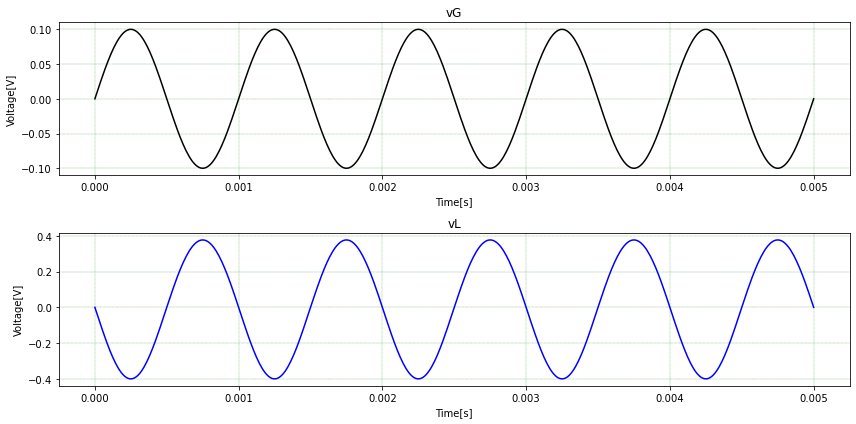

In [5]:
# rezultate corecte: nu stergeti celula 

#### 1.5. Determinarea amplificarii in curent 
1. pe baza rezultatelor obtinute in urma simularii circuitului din Figura 1, sa se calculeze valoarea modului amplificarii in curent a amplificatorului, $|A_I|$, in conditiile in care acesta nu este conectat la circuitele externe; pentru calculul valorii amplificarii in curent, se va utiliza relatia:

$$|A_I| = |A_V| \cdot \frac{R_i}{R_o}$$

unde:
- $R_i$ este rezistenta de intrare, determinata la punctul 1.3; este un obiect `Waveform` - in relatia de calcul se foloseste obiectul `Waveform` 
- $R_o$ este rezistenta de iesire; valoare acesteia se determinata dupa relatia din documentatia laboratorului si se atribuie unei variabile *Ro*;
- $|A_V|$ este modulul amplificarii in tensiune, determinat la punctul 1.2;

2. pe baza rezultatelor obtinute in urma simularii circuitului din Figura 2, sa se calculeze valoarea modului amplificarii reale in curent a amplificatorului, $|A_{Ig}|$, in conditiile in care acesta este conectat la circuitele externe; pentru calculul valorii amplificarii reale in curent, se va utiliza relatia:

$$|A_{Ig}| = |A_{Vg}| \cdot \frac{R_g}{R_L}$$

unde:
- $R_g$ este rezistenta generatorului de tensiune $v_G$;
- $R_L$ este rezistenta de sarcina; 
- $|A_{Vg}|$ este modulul amplificarea reala in tensiune, determinat la punctul 1.4;

**Observatii**: informatiile despre parametrii rezistoarelor utilizate in formulele de mai sus se vor extrage prin apelarea atributului `resistance`; $R_i$ se introduce in formula de calcul a amplificarii $|A_I|$, asa cum rezulta la punctul 1.3.

3. pe baza formulelor teoretice, prezentate in documentatia laboratorului, sa se calculeze valoarea modului amplificarii in curent a amplificatorului, $|A_{I-teoretic}|$, in conditiile in care acesta nu este conectat la circuitele externe;
4. pe baza formulelor teoretice, prezentate in documentatia laboratorului, sa se calculeze valoarea modului amplificarii in curent a amplificatorului, $|A_{Ig-teoretic}|$, in conditiile in care acesta este conectat la circuitele externe.

In [ ]:
# calcul AI
AI = ...

# calcul AIg
AIg = ...

# afisare AI (valoare numerica)

# afisare AIg (valoare numerica)

# afisare AI_teoretic (valoare numerica)

# afisare AIg_teoretic (valoare numerica)


In [6]:
# rezultate corecte: nu stergeti celula 

AI  = 6.398
AIg = 0.087
---------- Calcule teoretice ------
AI_teoretic  = 6.395
AIg_teoretic = 0.086


## 2. Banda de frecventa a amplificatorului conectat la circuitele externe
1. sa se simuleze circuitul din Figura 2 la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim variabil de semnal mic; parametrii analizei sunt:
  - frecventa start: 0.01[Hz]
  - frecventa stop: 1000[MHz]
  - variatie: pe decade
  - numar puncte pe decada, *POINTS* = 10
  
2. sa se determine tensiunea de intrare in circuit $v_G$, respectiv tensiunea pe sarcina amplificatorului $v_L$;
3. sa se determine variatia tensiunii de intrare in circuit $v_G$, respectiv variatia tensiunii pe sarcina amplificatorului $v_L$;
4. sa se determine valoarea modulului amplificarii in tensiune a circuitului, $|A_{Vg}|$
5. sa se determine valoarea din banda de frecventa a amplificarii in tensiune a circuitului $|A_{Vg0}|$
6. prin apelarea functiei `get_frequencies()`, implementata la inceputul laboratorului, sa se determine frecventele care corespund limitei benzii de frecventa: frecventa inferioara $f_J$, respectiv frecventa superioara $f_S$; variabilele  $f_J$ si $f_S$ sunt de tip `FrequencyValue`;
7. sa se determine valoarea benzii de frecventa $B$ a amplificatorului; 
8. sa se afiseze rezultatele obtinute;
9. sa se afiseze caracteristica de frecventa a amplificatorului; se recomanda apelarea functiei `draw_freq_characteristics()`, implementata la inceputul laboratorului.

In [ ]:
# analiza circuit si salvare rezultate analiza
POINTS_DEC  = ...   
analysis_ac = ...  # se utilizeaza simulator2

# extragere tensiune de intrare vG
vG_wf = ...

# extragere tensiune pe sarcina vL
vL_wf = ...

# calcul variatie vG
delta_vG = ...

# calcul variatie vL
delta_vL = ...

# calcul amplificare in tensiune AVg:
Avg_ac = ...

# calcul amplificare in tensiune in banda AVg0 
# rezultatul este similar celui obtinut la punctul 1.4:
Avg0_ac = ...

# determinare frecvente caracteristice:
# cele 2 frecvente sunt obiecte FrequencyValue
fJ, fS = ...

# calcul banda frecventa:
# B este de tip FrequencyValue
B = ...

# afisare valoare amplificare tensiune in banda (valoare numerica):

# afisare valoare frecventa inferioara (valoare numerica si unitare masura)

# afisare valoare frecventa superioara (valoare numerica si unitare masura)

# afisare valoare banda de frecventa (valoare numerica si unitare masura)

# afisare caracteristica de frecventa amplificator:


AVg0  = 3.892
fJ    = 0.06309573444801936 Hz
fS    = 6309573.444801964 Hz
B     = 6309573.381706229 Hz


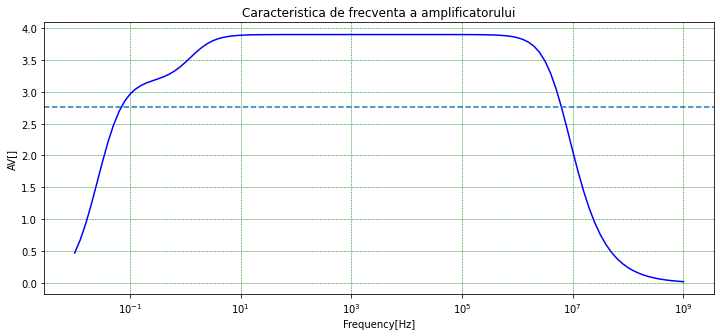

In [7]:
# rezultate corecte: nu stergeti celula 